In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
def plot_scp(block_scl, param, file_name):
    plt.figure() 
    x_values = [1, 2, 3, 4, 5, 6, 7]
    plt.plot(x_values, block_scl, 'bo-')
    plt.xlabel('Block')
    plt.ylabel('Mean '+param)
    plt.title(f'Mean {param} for each block - Subject {file_name}')
    #plt.show()
    plt.savefig('SCL_'+str(file_name)+'.jpg')

In [4]:
def mean_block_scl(data):
    block_start = data['bp_data'][0][0][6]
    bpdata = data['bp_data'][0][0][0]
    scl = bpdata[:, 2]
    time = np.arange(0, len(scl))
    block_duration = np.diff(np.concatenate(([0], block_start.flatten())))

    block_scl = []

    for start, duration in zip(block_start.flatten(), block_duration):
        if len(scl[np.logical_and(time >= start, time < start + duration)]) == 0:
            block_scl.append(0)
            continue
        block_scl.append(np.mean(scl[np.logical_and(time >= start, time < start + duration)]))

    return block_scl

In [10]:
def plot_scl_with_blocks(data):
    block_start = data['bp_data'][0][0][6]
    bpdata = data['bp_data'][0][0][0]
    scl = bpdata[:, 2]
    time = np.arange(0, len(scl))
    block_duration = np.diff(np.concatenate(([0], block_start.flatten())))

    fig, ax = plt.subplots()
    ax.plot(time, scl, label='SCL')
    for start in block_start.flatten():
        ax.axvline(start, color='gray', linestyle='--', linewidth=1)
    ax.set_xlabel('Time')
    ax.set_ylabel('SCL')
    ax.legend()
    plt.show()

C:\Users\mgkam\AppData\Local\Temp\ipykernel_27884\1069482979.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Group 1 Subjects:  [9, 12, 19, 20, 21, 24, 27, 29]
Group 2 Subjects:  [8, 10, 11, 16, 18, 26]
                sum_sq    df           F        PR(>F)
group        52.366358   1.0   34.048580  1.133225e-04
block3_scl  347.078343   1.0  225.670164  1.121957e-08
Residual     16.917885  11.0         NaN           NaN


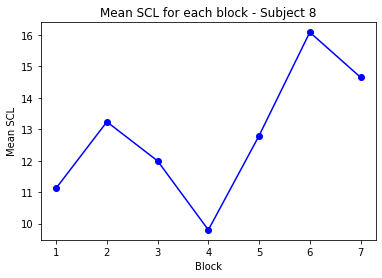

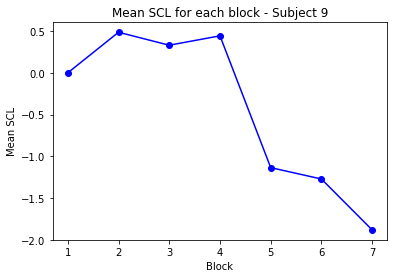

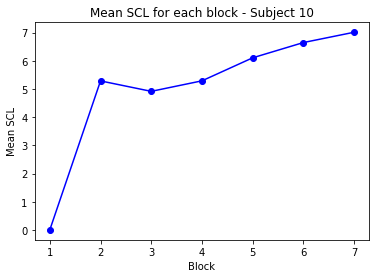

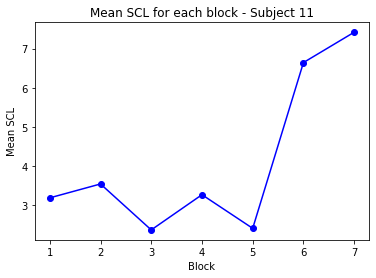

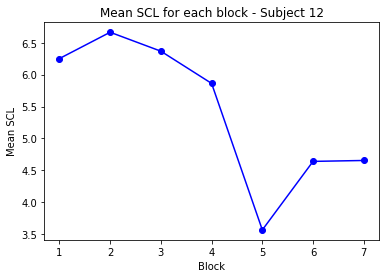

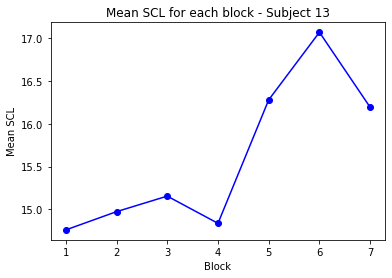

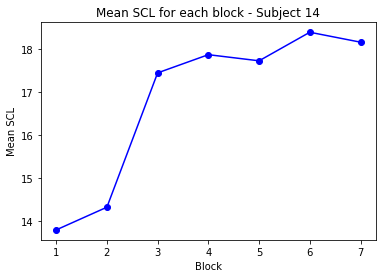

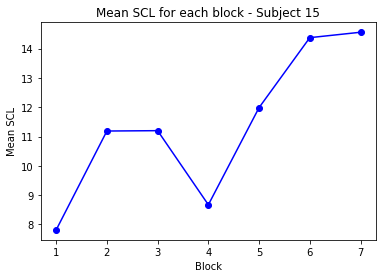

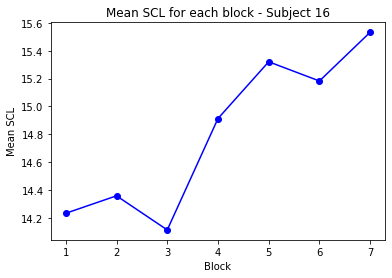

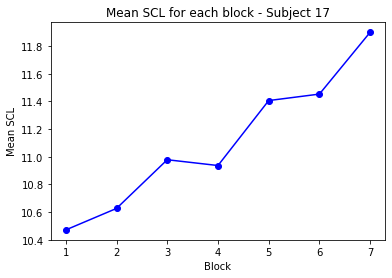

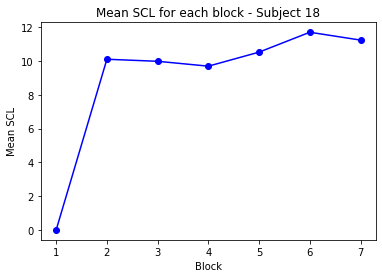

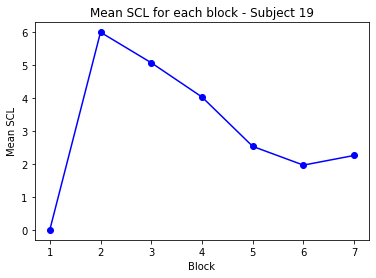

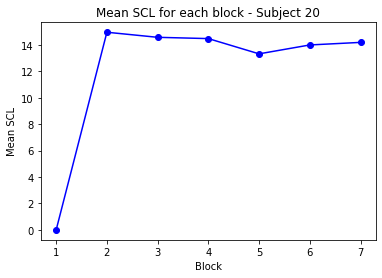

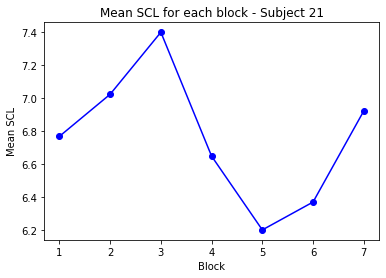

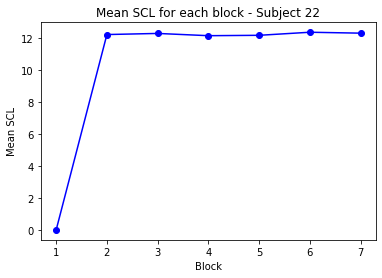

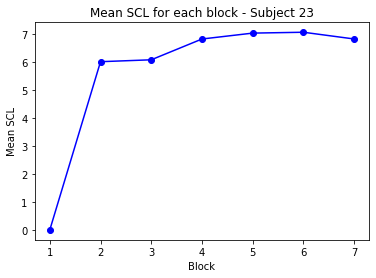

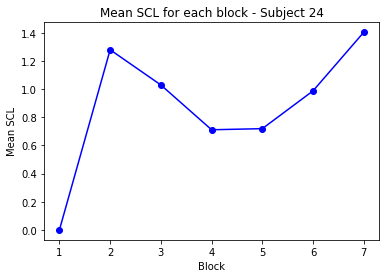

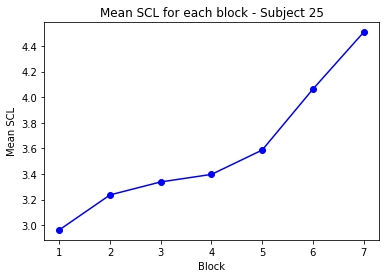

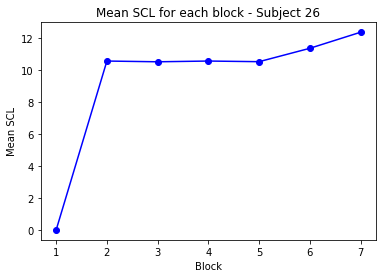

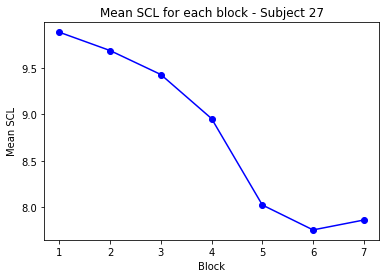

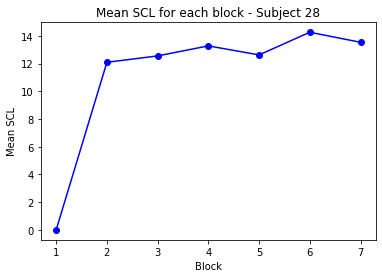

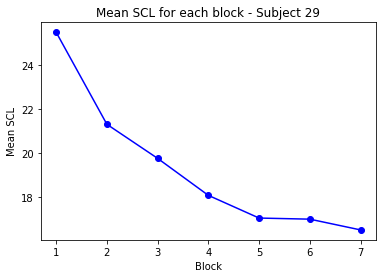

In [44]:
import scipy.io
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define file path and range of files to process
file_name = 'Physio_Events_'
file_prefix = 'D:/IU/Academics/Semester 2/DATA SCI OF PHYSIO TIME SERIE/Final Project/records/'+file_name
file_range = range(8, 30)

# Initialize lists to store mean SCL values in Blocks 3 and 6 for each group
group1_block2_scl = []
group1_block3_scl = []
group1_block6_scl = []
group2_block2_scl = []
group2_block3_scl = []
group2_block6_scl = []

# Initialize empty lists to store the IDs of subjects in each group
group1_subjects = []
group2_subjects = []


# Process each file in the specified range
for i in file_range:
    file_path = file_prefix + str(i) + '.mat'
    mat_data = scipy.io.loadmat(file_path)
    
    # Get mean SCL values for the current file
    block_scl = mean_block_scl(mat_data)

    # Append mean SCL values in Blocks 3 and 6 to respective lists for each group
    if (block_scl[2] > block_scl[5]):
        group1_block2_scl.append(block_scl[1])
        group1_block3_scl.append(block_scl[2])
        group1_block6_scl.append(block_scl[5])
        group1_subjects.append(i)
    elif (block_scl[2] <= block_scl[1]) and (block_scl[5] > block_scl[2]):
        group2_block2_scl.append(block_scl[1])
        group2_block3_scl.append(block_scl[2])
        group2_block6_scl.append(block_scl[5])
        group2_subjects.append(i)
        
    plot_scp(block_scl, 'SCL', i)

print("Group 1 Subjects: ", group1_subjects)
print("Group 2 Subjects: ", group2_subjects)

# Use only the selected blocks for ANOVA
data_group1 = pd.DataFrame({'block2_scl': group1_block2_scl, 'block3_scl': group1_block3_scl, 'block6_scl': group1_block6_scl})
data_group2 = pd.DataFrame({'block2_scl': group2_block2_scl, 'block3_scl': group2_block3_scl, 'block6_scl': group2_block6_scl})

# Add a column to each dataframe to indicate the group of the subject
data_group1['group'] = '1'
data_group2['group'] = '2'

# Combine the dataframes
data = pd.concat([data_group1, data_group2])

# Convert the data in the relevant columns to float
data['block3_scl'] = data['block3_scl'].astype(float)
data['block6_scl'] = data['block6_scl'].astype(float)
data['block2_scl'] = data['block2_scl'].astype(float)

data.to_csv('scl_data.csv')
# Fit the ANOVA model
model = ols('block6_scl ~ group + block3_scl', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


In [ ]:
import scipy.io
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define file path and range of files to process
file_name = 'Physio_Events_'
file_prefix = 'D:/IU/Academics/Semester 2/DATA SCI OF PHYSIO TIME SERIE/Final Project/records/'+file_name
file_range = range(8, 30)

# Initialize lists to store mean SCL values in Blocks 3 and 6 for each group
group1_block2_scl = []
group1_block3_scl = []
group1_block6_scl = []
group2_block2_scl = []
group2_block3_scl = []
group2_block6_scl = []
rest_period = 30000

# Initialize empty lists to store the IDs of subjects in each group
group1_subjects = []
group2_subjects = []


# Process each file in the specified range
for i in file_range:
    file_path = file_prefix + str(i) + '.mat'
    mat_data = scipy.io.loadmat(file_path)
    
    # Get mean SCL values for the current file
    block_scl = mean_block_scl(mat_data)

    # Append mean SCL values in Blocks 3 and 6 to respective lists for each group
    if (block_scl[2] > block_scl[5]):
        group1_block2_scl.append(block_scl[1])
        group1_block3_scl.append(block_scl[2])
        group1_block6_scl.append(block_scl[5])
        group1_subjects.append(i)
    elif (block_scl[2] <= block_scl[1]) and (block_scl[5] > block_scl[2]):
        group2_block2_scl.append(block_scl[1])
        group2_block3_scl.append(block_scl[2])
        group2_block6_scl.append(block_scl[5])
        group2_subjects.append(i)
        
    #plot_scp(block_scl, 'SCL', file_path)

print("Group 1 Subjects: ", group1_subjects)
print("Group 2 Subjects: ", group2_subjects)

# Use only the selected blocks for ANOVA
data_group1 = pd.DataFrame({'block2_scl': group1_block2_scl, 'block3_scl': group1_block3_scl, 'block6_scl': group1_block6_scl})
data_group2 = pd.DataFrame({'block2_scl': group2_block2_scl, 'block3_scl': group2_block3_scl, 'block6_scl': group2_block6_scl})

# Add a column to each dataframe to indicate the group of the subject
data_group1['group'] = '1'
data_group2['group'] = '2'

# Combine the dataframes
data = pd.concat([data_group1, data_group2])

# Convert the data in the relevant columns to float
data['block3_scl'] = data['block3_scl'].astype(float)
data['block6_scl'] = data['block6_scl'].astype(float)
data['block2_scl'] = data['block2_scl'].astype(float)

data.to_csv('scl_data.csv')
# Fit the ANOVA model
model = ols('block6_scl ~ group + block3_scl', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

subject 8 [10200, 3727, 2374, 2219, 3316, 4160, 2806]


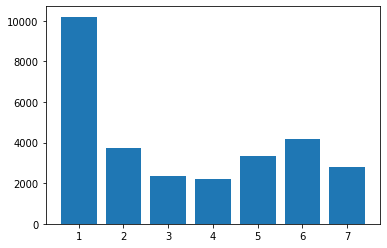

subject 9 [0, 773, 174, 428, 216, 619, 435]


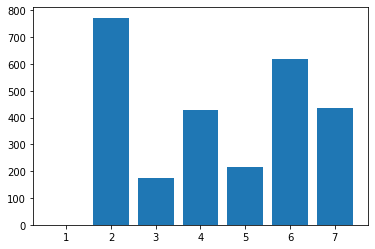

subject 10 [0, 29, 44, 79, 73, 146, 89]


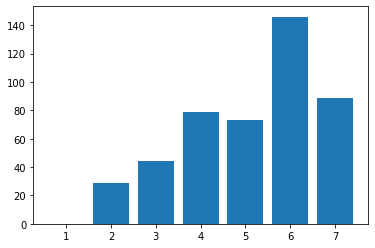

subject 11 [744, 590, 261, 469, 397, 1236, 164]


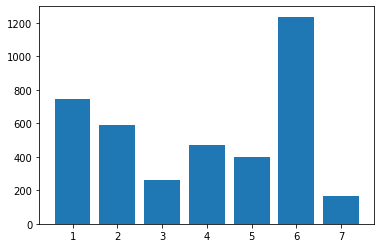

subject 12 [162, 125, 52, 53, 96, 102, 110]


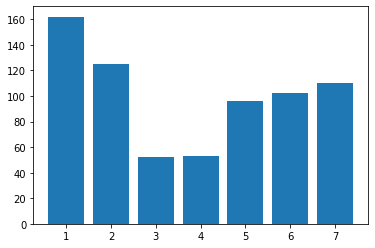

subject 13 [153, 617, 454, 262, 497, 537, 219]


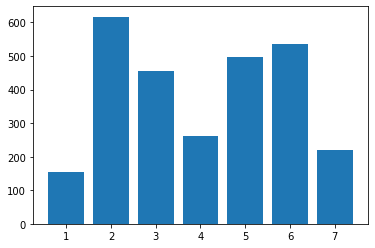

subject 14 [622, 949, 958, 500, 535, 662, 353]


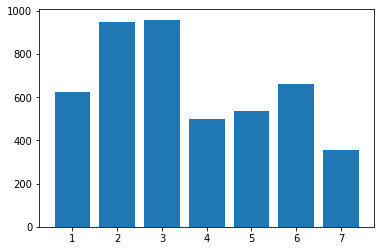

subject 15 [1511, 374, 158, 264, 1186, 290, 155]


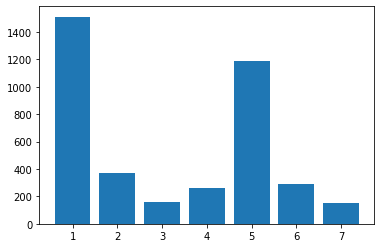

subject 16 [508, 151, 204, 168, 96, 190, 99]


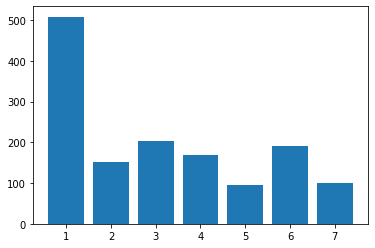

subject 17 [268, 276, 188, 122, 259, 208, 297]


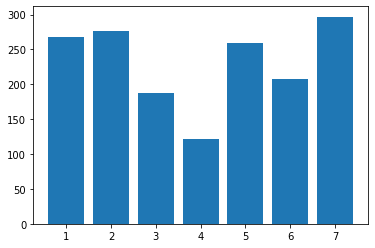

subject 18 [0, 540, 299, 385, 397, 513, 420]


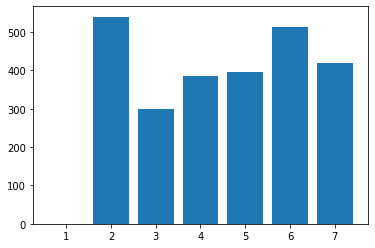

subject 19 [0, 136, 25, 43, 18, 27, 48]


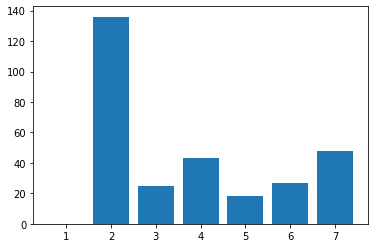

subject 20 [0, 400, 267, 302, 314, 308, 175]


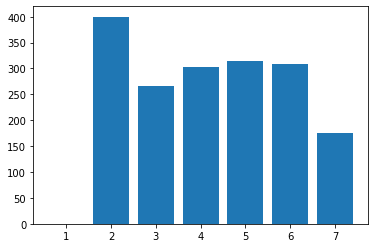

subject 21 [212, 210, 254, 64, 97, 134, 97]


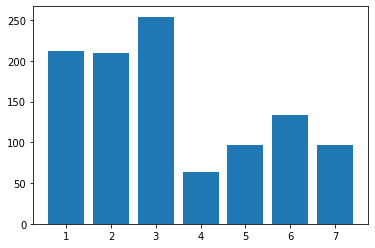

subject 22 [0, 72, 39, 36, 63, 89, 51]


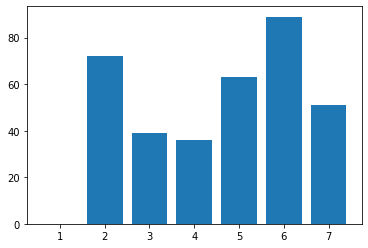

subject 23 [0, 156, 159, 278, 219, 140, 177]


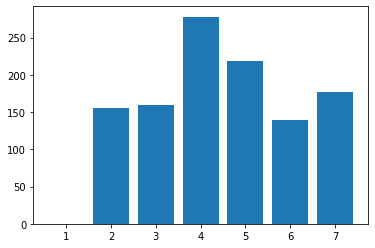

subject 24 [0, 940, 237, 177, 259, 269, 238]


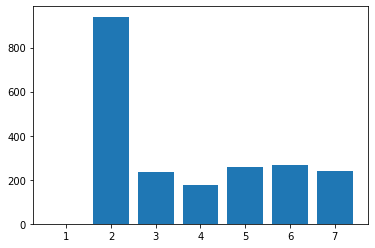

subject 25 [22, 40, 30, 57, 38, 86, 38]


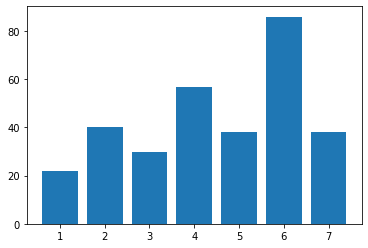

subject 26 [0, 450, 185, 196, 298, 491, 438]


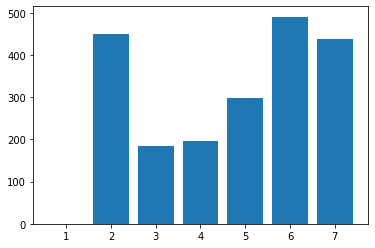

subject 27 [526, 148, 92, 143, 37, 75, 67]


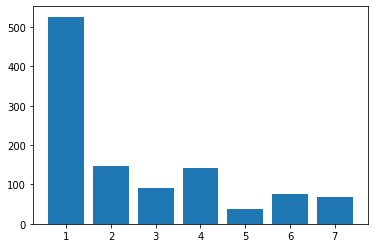

subject 28 [0, 142, 304, 205, 250, 375, 111]


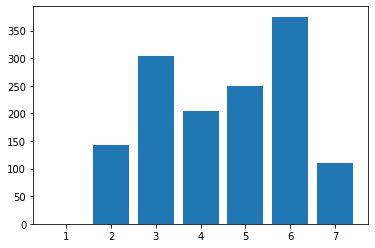

subject 29 [2, 533, 266, 303, 235, 471, 380]


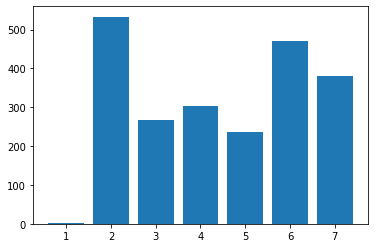

In [22]:
for i in file_range:
    file_path = file_prefix + str(i) + '.mat'
    mat_data = scipy.io.loadmat(file_path)

    #plot_scl_with_blocks(mat_data)
    scr_freq = find_block_scr(mat_data)
    print("subject "+str(i), scr_freq)
    # Create x-axis ticks
    x_ticks = range(1, len(scr_freq)+1)

    # Create bar plot
    plt.bar(x_ticks, scr_freq)

    # Set x-axis labels
    plt.xticks(x_ticks)

    # Show the plot
    plt.show()

In [14]:
def find_block_scr(data):
    block_start = data['bp_data'][0][0][6]
    bpdata = data['bp_data'][0][0][0]
    scl = bpdata[:, 2]
    time = np.arange(0, len(scl))
    block_duration = np.diff(np.concatenate(([0], block_start.flatten())))

    block_scr_changes = []
    last_scr = 0

    for start, duration in zip(block_start.flatten(), block_duration):
        block_scr_change_count = 0
        if len(scl[np.logical_and(time >= start, time < start + duration)]) == 0:
            block_scr_changes.append(0)
            continue
        
        for t, s in zip(time[np.logical_and(time >= start, time < start + duration)], 
                         scl[np.logical_and(time >= start, time < start + duration)]):
            if s - last_scr >= 0.01:
                block_scr_change_count += 1
            last_scr = s
        
        block_scr_changes.append(block_scr_change_count)

    return block_scr_changes

In [32]:
import scipy.io
import numpy as np
from scipy.stats import f_oneway
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define file path and range of files to process
file_name = 'Physio_Events_'
file_prefix = 'D:/IU/Academics/Semester 2/DATA SCI OF PHYSIO TIME SERIE/Final Project/records/'+file_name
file_range = range(8, 30)

# List of SCR changes for all subjects
all_subjects_scr = []

for i in file_range:
    file_path = file_prefix + str(i) + '.mat'
    mat_data = scipy.io.loadmat(file_path)
    
    # Get mean SCL values for the current file
    block_scr = find_block_scr(mat_data)
    all_subjects_scr.append(block_scr)

# Extract SCR changes for blocks 3, 4 vs 6, 7 for all subjects
block_34_scr = np.array([subject_scr[2:4] + subject_scr[6:8] for subject_scr in all_subjects_scr])

# Create a DataFrame with the SCR data and subject ID
scr_data = pd.DataFrame({'SCR': block_34_scr.flatten(), 
                         'Block': np.repeat([3, 4, 6, 7], len(file_range)), 
                         'Subject': np.tile(range(1, len(file_range) + 1), 4)})

print(scr_data)
# Fit the repeated measures ANOVA model
#model = ols('SCR ~ Block + Subject + Block:Subject', data=scr_data).fit()
#aov_table = sm.stats.anova_lm(model, typ=2)

#print(aov_table)

ValueError: All arrays must be of the same length